In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

TEST_SPLIT_SIZE = .3
RANDOM_STATE = 2055  # Parties in the sky

In [50]:
tf.keras.utils.set_random_seed(RANDOM_STATE)

In [51]:


def get_data(encode_y=False):
    vehicle_data = np.genfromtxt("./datos.csv", delimiter=",")

    X = vehicle_data[:, 0: -1]

    y = vehicle_data[:, -1].astype(int)
    y = y - 1

    # X_train, X_test, y_train, y_test = X[:7], X[7:], y[:7], y[7:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE)

    if encode_y:
        num_classes = max(y) + 1
        # Convert sparse labels to one-hot encoded labels for categorical_crossentropy
        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)

    return X_train, X_test, y_train, y_test

In [52]:
def plot_losses(history, title):
    last_epoch_loss = history.history['loss'][-1]
    last_epoch_val_loss = history.history['val_loss'][-1]

    figure = plt.figure(figsize=(10, 8))

    axes = figure.add_subplot(1, 1, 1)

    axes.plot(history.history['loss'], color="#003B80", linestyle="dotted",
              label=f"loss entrenamiento {last_epoch_loss:.2f}")
    axes.plot(history.history['val_loss'], color="#003B80", label=f"loss validación {last_epoch_val_loss:.2f}")

    axes.set_xlabel('Época', color="#003B80", fontsize=14)
    axes.set_ylabel('Pérdidas', color="#003B80", fontsize=14)

    axes.set_title(title, fontsize=18)
    axes.set_facecolor('#F0F7FF')
    axes.legend(loc="best")
    axes.grid(visible=True, which='major', axis='both', color="#FFFFFF", linewidth=2)
    axes.set_axisbelow(True)
    # axes.set_ylim(ymin=0, ymax=1.1)
    # axes.yaxis.set_major_locator(MultipleLocator(0.1))

    return figure


In [53]:
def create_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_dim=4))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    return model


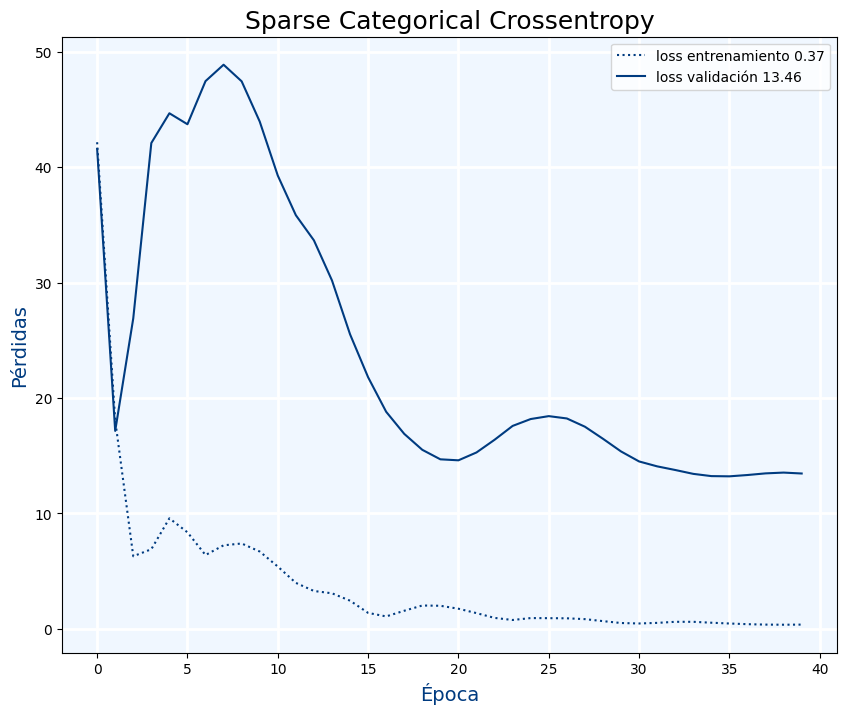

In [54]:
X_train, X_test, y_train, y_test = get_data()
model_sparse = create_model()
model_sparse.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

history_sparse = model_sparse.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=32,
                                  verbose=False)
_ = plot_losses(history_sparse, "Sparse Categorical Crossentropy")


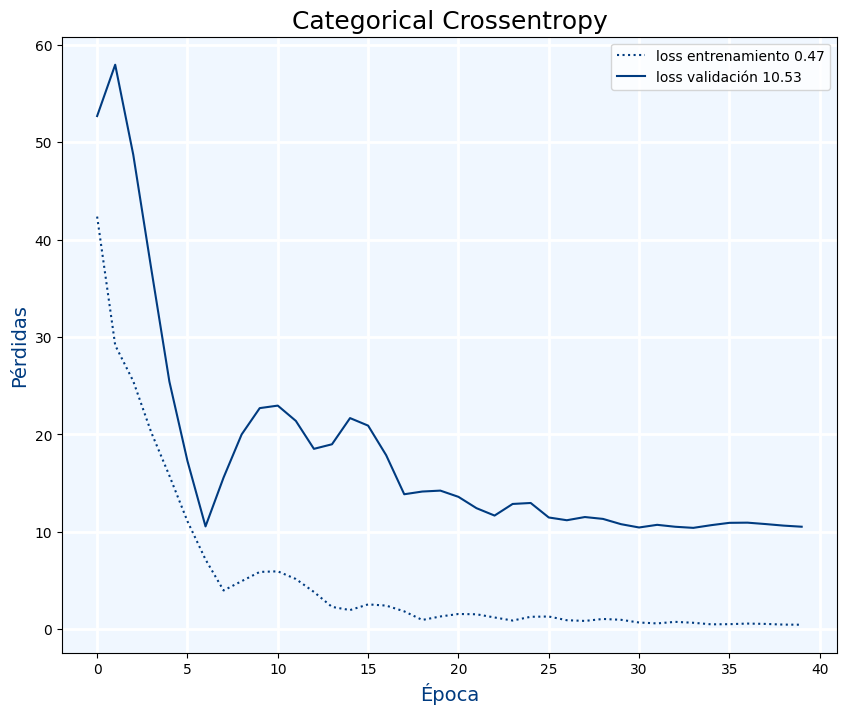

In [55]:
X_train, X_test, y_train, y_test = get_data(True)
model_categorical = create_model()
model_categorical.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

history = model_categorical.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,
                                batch_size=32, verbose=False)
_ = plot_losses(history, "Categorical Crossentropy")
